##Agglomerative Hierarchical Clustering (Dendrogram) from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Data

In [2]:

x1 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(5,5))
x2 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(5,5))
x3 = np.random.normal(loc=np.random.uniform(size=(5,))*10-5,size=(5,5))
x = np.vstack((x1,x2,x3))
shuffle = np.random.permutation(x.shape[0])
x = x[shuffle,:]
membership = shuffle.copy()
for i in range(len(membership)):
    if membership[i]<5: membership[i]=0
    elif membership[i]<10: membership[i]=1
    else: membership[i]=2
np.unique(membership,return_counts=True)

OriginalX=x.copy()
x=OriginalX.copy()
x=pd.DataFrame(x) 

### Distrance between obseravations

In [4]:

def MinDist(x):   
    MinDist=10000000
    Dist=0
    MinDistPair=(0,1)
    for i in range(x.index[-1]+1):
        for j in range(i+1,x.index[-1]+1):
            try:
                Dist=np.sqrt(np.sum(np.square(x.loc[i,:]-x.loc[j,:])))
            except KeyError:
                Dist=100000000
            if Dist < MinDist:
                MinDist = Dist
                MinDistPair=(i,j,Dist)
    return(MinDistPair)

### Calculating the Cenroid of a newcluster 

In [5]:
def Centroid(p1,p2,x,l,c):
    if p1 < len(x) and p2 < len(x):
        c.append(x[p1])
        c.append(x[p2])
    elif p1 < len(x):
        for i in range(0,len(l)):  
            if l[i][4]==p2:
                Centroid(l[i][0],l[i][1],x,l,c)
    else:  
        for i in range(0,len(l)):  
            if l[i][4]==p2:
                Centroid(l[i][0],l[i][1],x,l,c)
        for i in range(0,len(l)):  
            if l[i][4]==p1:
                Centroid(l[i][0],l[i][1],x,l,c)
    return np.matrix(c).mean(0).tolist()[0]


### Linked nodes and distance between the nodes

In [6]:

Linkage=[]
for i in range(len(OriginalX)-1):
    c=[]
    MDPair=MinDist(x)
    Avg=Centroid(MDPair[0],MDPair[1],OriginalX,Linkage,c)
    x.loc[x.index[-1]+1,:]=Avg
   
    if MDPair[0] < len(OriginalX) and MDPair[1] < len(OriginalX):
        l=[MDPair[0],MDPair[1],MDPair[2],2,x.index[-1]]
    elif MDPair[0] >= len(OriginalX) and MDPair[1] >= len(OriginalX):
        l=[MDPair[0],MDPair[1],MDPair[2],Linkage[MDPair[0]-len(OriginalX)][3]+Linkage[MDPair[1]-len(OriginalX)][3],x.index[-1]]
    else:
        l=[MDPair[0],MDPair[1],MDPair[2],Linkage[MDPair[1]-len(OriginalX)][3]+1,x.index[-1]]    
    Linkage.append(l)
    x=x.drop(axis=0, index=MDPair[1])
    x=x.drop(axis=0, index=MDPair[0])


### linkage node sequence for Dendrogram

In [7]:
 def group(currmember,allMember,B):
    
    left=currmember[0]
    if left >= (len(Linkage)+1):
        for i in range(0,len(allMember)):
            if allMember[i][4]==left:
               group(allMember[i],allMember,B)
    else:
        B.append(left)
    right=currmember[1]
    if right >= (len(Linkage)+1):
        for i in range(0,len(allMember)):
            if allMember[i][4]==right:
                group(allMember[i],allMember,B)
    else:
        B.append(right)
    return B    

B=[]
print("Likange : Between Nodes which contains Node1, Node2, Distance, Degree and New Node")
print(pd.DataFrame(Linkage))
print(group(Linkage[-1],Linkage,B))


Likange : Between Nodes which contains Node1, Node2, Distance, Degree and New Node
     0   1          2   3   4
0   13  14   1.571434   2  15
1   11  12   1.669676   2  16
2    5  15   1.999509   3  17
3    2   8   2.423500   2  18
4    4  16   2.537870   3  19
5   10  17   2.830129   4  20
6    9  18   2.851379   3  21
7    7  19   3.069725   4  22
8    6  22   3.239932   5  23
9    0  21   3.599122   4  24
10   3  20   4.093725   5  25
11   1  24   4.285585   5  26
12  23  25   7.865615  10  27
13  26  27  10.662310  15  28
[1, 0, 9, 2, 8, 6, 7, 4, 11, 12, 3, 10, 5, 13, 14]


### Ploting the Dendrogram

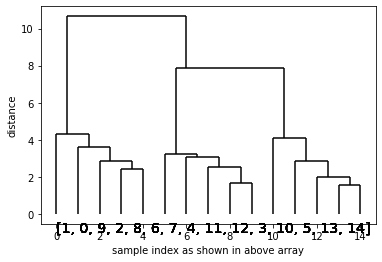

In [8]:
depthbreadth=[]
for i in range(0,len(Linkage)):
    plt.xlabel('sample index as shown in above array')
    plt.ylabel('distance')
    plt.text(0, -1, B , fontsize=14)
    l = Linkage[i][0]
    r = Linkage[i][1]  
    if Linkage[i][3] == 2:
        xl=B.index(l)
        xr=B.index(r)
        dh=[xl,xr,Linkage[i][2],l,r]
        depthbreadth.append(dh)
        plt.vlines(x=xl,ymin=0,ymax=Linkage[i][2],label='{0}'.format(Linkage[i][0]))
        plt.vlines(x=xr,ymin=0,ymax=Linkage[i][2],label='{0}'.format(Linkage[i][1]))
        plt.hlines(y=Linkage[i][2],xmin=xl,xmax=xr)
    elif (l<len(OriginalX)):
        xl=B.index(l)
        xr=depthbreadth[r-len(OriginalX)][0]+0.5
        dh=[xl,xr,Linkage[i][2],l,r]
        depthbreadth.append(dh)
        plt.vlines(x=xl,ymin=0,ymax=Linkage[i][2],label='{0}'.format(Linkage[i][0]))
        plt.vlines(x=xr,ymin=Linkage[r-len(OriginalX)][2],ymax=Linkage[i][2],label='{0}'.format(Linkage[i][1]))
        plt.hlines(y=Linkage[i][2],xmin=xl,xmax=xr)
    else:
        xl=depthbreadth[l-len(OriginalX)][0]+0.5
        xr=depthbreadth[r-len(OriginalX)][0]+0.5
        dh=[xl,xr,Linkage[i][2],l,r]
        depthbreadth.append(dh)
        plt.vlines(x=xl,ymin=Linkage[l-len(OriginalX)][2],ymax=Linkage[i][2],label='{0}'.format(Linkage[i][0]))
        plt.vlines(x=xr,ymin=Linkage[r-len(OriginalX)][2],ymax=Linkage[i][2],label='{0}'.format(Linkage[i][1]))
        plt.hlines(y=Linkage[i][2],xmin=xl,xmax=xr)


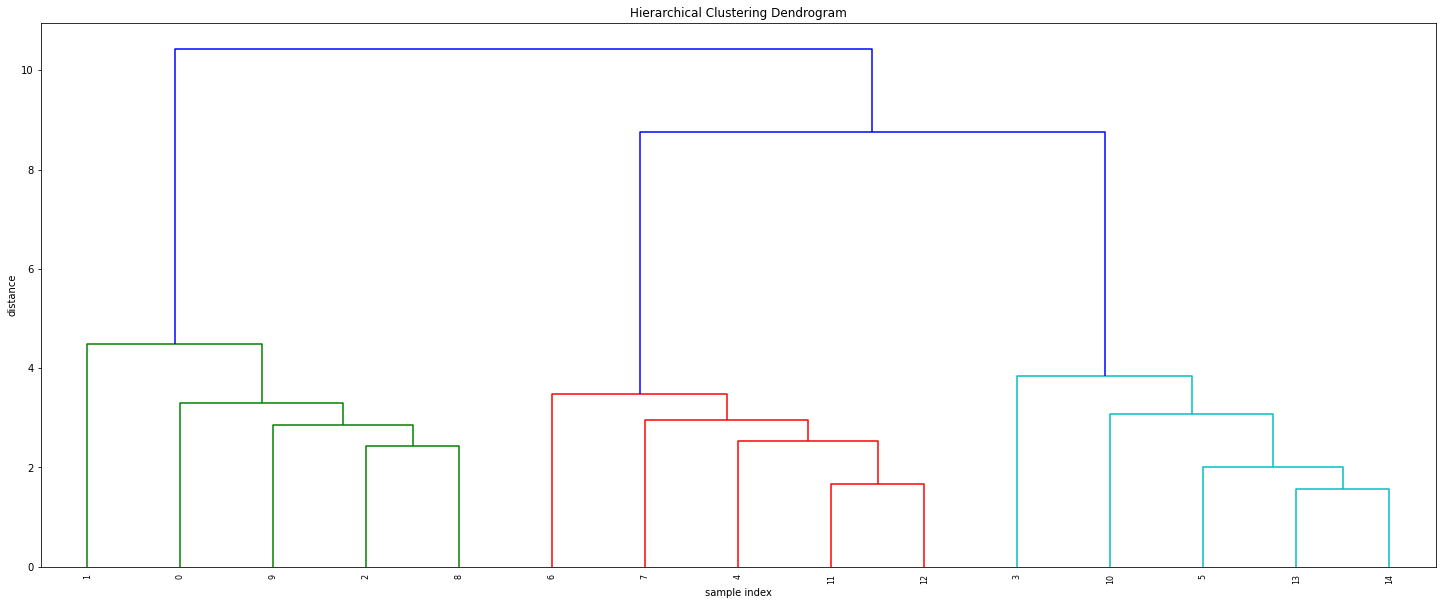

In [9]:
#### Verify the dendrogram with SCIPY Package
# =============================================================================
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
#Linkage
 
 
Z = linkage(OriginalX,'centroid')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
# 
# =============================================================================
